In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from math import log
import math
from sklearn.metrics import log_loss

In [0]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

 Split data  into train test split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

 Apply sklearn's SGDClassifier and find weights

In [0]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.07 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.08 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

Sigmoid

In [0]:
def sigmoid(w,x,b):
  Z = np.dot(w,x)+b
  return(1/(1 + np.exp(-Z)))

In [0]:
def mod(w):
  sum1 = 0
  for i in w:
    sum1  = sum1 + i*i
  return(math.sqrt(sum1)) 

Initialize values

In [0]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

Find initial loss and append it to list

In [0]:
TRAIN_LOSS = []
TEST_LOSS = []


#Train loss
loss = 0
for i in range(len(X_train)):
  loss += (np.log(sigmoid(w,X_train[i],b)) * y_train[i] + np.log(1 - sigmoid(w,X_train[i],b)) * (1 - y_train[i]))
loss = (-1)*loss/len(X_train) 
TRAIN_LOSS.append(loss)

#Test Loss
loss = 0
for i in range(len(X_test)):
  loss += (np.log(sigmoid(w,X_test[i],b)) * y_test[i] + np.log(1 - sigmoid(w,X_test[i],b)) * (1 - y_test[i]))
loss = (-1)*loss/len(X_test) 
TEST_LOSS.append(loss)

Apply algorithm to find weights and loss

In [0]:
from sklearn.metrics import log_loss
l = len(X_train)
for ep in range(20):

  '''Update weights and intercept for each point'''
  for i in range(len(X_train)):
    w = (1 - (0.0001)/l)*w + 0.0001 * X_train[i] * (y_train[i] - sigmoid(w,X_train[i],b))
    
    b = b + 0.0001*(y_train[i]-sigmoid(w,X_train[i],b))

  ''' Find Loss'''
  #Train loss
  loss = 0
  for i in range(len(X_train)):
    loss += (np.log(sigmoid(w,X_train[i],b)) * y_train[i] + np.log(1 - sigmoid(w,X_train[i],b)) * (1 - y_train[i]))
  loss = (-1)*loss/len(X_train) 
  TRAIN_LOSS.append(loss)

  #Test Loss
  loss = 0
  for i in range(len(X_test)):
    loss += (np.log(sigmoid(w,X_test[i],b)) * y_test[i] + np.log(1 - sigmoid(w,X_test[i],b)) * (1 - y_test[i]))
  loss = (-1)*loss/len(X_test) 
  TEST_LOSS.append(loss)

Print weights and intercept of model

In [72]:
print("Weights are :",w)

print("Intercept :" ,b)

Weights are : [-4.29288445e-01  1.92871197e-01 -1.48268287e-01  3.38050859e-01
 -2.20618116e-01  5.69556730e-01 -4.45141511e-01 -9.00148624e-02
  2.21541575e-01  1.73523343e-01  1.98483126e-01 -3.89253433e-04
 -8.10827249e-02  3.39028140e-01  2.29311637e-02]
Intercept : -0.8893357037092375


Train LOSS vs Test LOSS

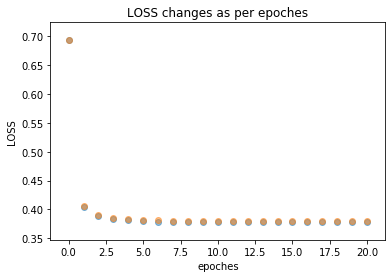

In [68]:
import matplotlib.pyplot as plt
plt.scatter([i for i in range(21)] ,TRAIN_LOSS, alpha=0.5)
plt.scatter([i for i in range(21)] ,TEST_LOSS, alpha=0.5)
plt.title('LOSS changes as per epoches')
plt.xlabel('epoches')
plt.ylabel('LOSS')
plt.show()

In [69]:
print(TRAIN_LOSS)
print(TEST_LOSS)

[0.6931471805594285, 0.40403483540154406, 0.38840566283891775, 0.3831502802782614, 0.38078871559282973, 0.379607672225668, 0.37898564992939876, 0.3786485612275279, 0.378462691564947, 0.3783590220296394, 0.37830072273472676, 0.37826772813870235, 0.37824895464056285, 0.3782382205698343, 0.37823205354111267, 0.3782284922246273, 0.37822642377879395, 0.37822521431092593, 0.37822450142930525, 0.37822407720132234, 0.37822382185251546]
[0.6931471805600672, 0.4051805305933462, 0.390082036516956, 0.38502563017730945, 0.3827437054953831, 0.38159384442002586, 0.3809828490732264, 0.38064856398667934, 0.3804623679553379, 0.38035738397577284, 0.3802976393667366, 0.3802633727664767, 0.38024357524785823, 0.38023205220637907, 0.38022529124297644, 0.3802212882173815, 0.38021889316530333, 0.3802174426735918, 0.3802165518697225, 0.38021599608955914, 0.3802156432528444]


#Compare weights and intercept

In [70]:
w-clf.coef_, b-clf.intercept_

(array([[-0.00592153,  0.00739555,  0.00032207, -0.00339321, -0.01243141,
          0.00939094,  0.00728331,  0.00407327,  0.01226838, -0.00731792,
          0.00143122, -0.00460841, -0.00147903,  0.00050012,  0.00026395]]),
 array([-0.03619741]))

In [64]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9524266666666666
0.95024
